In [ ]:
# Imports
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

In [ ]:
# Download dataset
url = 'https://drive.google.com/uc?id=1CwsYiq3UNMAs7iMhHeRjcs6L1eD1EIqU'
df = pd.read_csv(url).drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# A

In [ ]:
# Imputing NaN values
imputer = IterativeImputer(random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0


In [ ]:
X = df_imputed.drop(columns=['quality'])
y = df_imputed['quality']

In [ ]:
def softmax(logits):
    exp_values = [math.exp(logit) for logit in logits]
    total = sum(exp_values)
    return [exp_value / total for exp_value in exp_values]

def cross_entropy_loss(y_true, y_pred):
    loss = 0.0
    for i in range(len(y_true)):
        loss -= math.log(y_pred[i][y_true[i]] + 1e-15)  # Add epsilon to avoid log(0)
    return loss / len(y_true)

def initialize_parameters(n_features, n_classes):
    weights = [[random.uniform(-0.01, 0.01) for _ in range(n_features)] for _ in range(n_classes)]
    biases = [0.0] * n_classes
    return weights, biases

def forward_pass(X, weights, biases):
    logits = []
    for i in range(len(weights)):
        logit = sum(X[j] * weights[i][j] for j in range(len(X))) + biases[i]
        logits.append(logit)
    return softmax(logits)

def predict(X, weights, biases):
    predictions = []
    for i in range(len(X)):
        probabilities = forward_pass(X[i], weights, biases)
        predicted_class = probabilities.index(max(probabilities))
        predictions.append(predicted_class)
    return predictions

def train(X, y, n_classes, learning_rate=0.005, epochs=2000):
    n_features = len(X[0])
    weights, biases = initialize_parameters(n_features, n_classes)

    for epoch in range(epochs):
        for i in range(len(X)):
            # Forward pass
            probabilities = forward_pass(X[i], weights, biases)

            # Calculate gradients and update weights and biases
            for k in range(n_classes):
                error = probabilities[k] - (1 if y[i] == k else 0)
                for j in range(n_features):
                    weights[k][j] -= learning_rate * error * X[i][j]
                biases[k] -= learning_rate * error

        # Calculate loss every 100 epochs for monitoring
        if epoch % 100 == 0:
            y_pred = [forward_pass(X[i], weights, biases) for i in range(len(X))]
            loss = cross_entropy_loss(y, y_pred)
            print(f'Epoch {epoch}, Loss: {loss:.4f}')

    return weights, biases

# B

In [ ]:
# Normalize, standardize, and apply robust scaling to the features
X_normalized = (X - X.min()) / (X.max() - X.min())
X_standardized = (X - X.mean()) / X.std()

# Convert features and target to lists
X_normalized = X_normalized.values.tolist()
X_standardized = X_standardized.values.tolist()
y = y.tolist()

# Convert labels to integers starting from 0 (for categorical targets)
label_mapping = {label: index for index, label in enumerate(sorted(set(y)))}
y_normalized = [label_mapping[label] for label in y]
y_standardized = [label_mapping[label] for label in y]

# Number of classes
n_classes = len(label_mapping)

# Split the data into training and testing sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standardized, y_standardized, test_size=0.2, random_state=42)
# Train and evaluate with normalized features
weights_norm, biases_norm = train(X_train_norm, y_train_norm, n_classes)
y_pred_norm = predict(X_test_norm, weights_norm, biases_norm)
accuracy_norm = sum([1 for i in range(len(y_test_norm)) if y_test_norm[i] == y_pred_norm[i]]) / len(y_test_norm)
print('Accuracy with normalization:', accuracy_norm)

# Train and evaluate with standardized features
weights_std, biases_std = train(X_train_std, y_train_std, n_classes)
y_pred_std = predict(X_test_std, weights_std, biases_std)
accuracy_std = sum([1 for i in range(len(y_test_std)) if y_test_std[i] == y_pred_std[i]]) / len(y_test_std)
print('Accuracy with standardization:', accuracy_std)

# Compare results
print(f"Comparison of Accuracies:\nNormalization: {accuracy_norm:.4f}\nStandardization: {accuracy_std:.4f}")

Epoch 0, Loss: 1.2610
Epoch 100, Loss: 0.9748
Epoch 200, Loss: 0.9543
Epoch 300, Loss: 0.9441
Epoch 400, Loss: 0.9377
Epoch 500, Loss: 0.9333
Epoch 600, Loss: 0.9300
Epoch 700, Loss: 0.9274
Epoch 800, Loss: 0.9253
Epoch 900, Loss: 0.9236
Epoch 1000, Loss: 0.9222
Epoch 1100, Loss: 0.9210
Epoch 1200, Loss: 0.9199
Epoch 1300, Loss: 0.9190
Epoch 1400, Loss: 0.9182
Epoch 1500, Loss: 0.9175
Epoch 1600, Loss: 0.9169
Epoch 1700, Loss: 0.9163
Epoch 1800, Loss: 0.9158
Epoch 1900, Loss: 0.9153
Accuracy with normalization: 0.6331877729257642
Epoch 0, Loss: 1.1475
Epoch 100, Loss: 0.9131
Epoch 200, Loss: 0.9101
Epoch 300, Loss: 0.9089
Epoch 400, Loss: 0.9083
Epoch 500, Loss: 0.9079
Epoch 600, Loss: 0.9077
Epoch 700, Loss: 0.9075
Epoch 800, Loss: 0.9074
Epoch 900, Loss: 0.9073
Epoch 1000, Loss: 0.9072
Epoch 1100, Loss: 0.9072
Epoch 1200, Loss: 0.9071
Epoch 1300, Loss: 0.9071
Epoch 1400, Loss: 0.9071
Epoch 1500, Loss: 0.9070
Epoch 1600, Loss: 0.9070
Epoch 1700, Loss: 0.9070
Epoch 1800, Loss: 0.9070
E

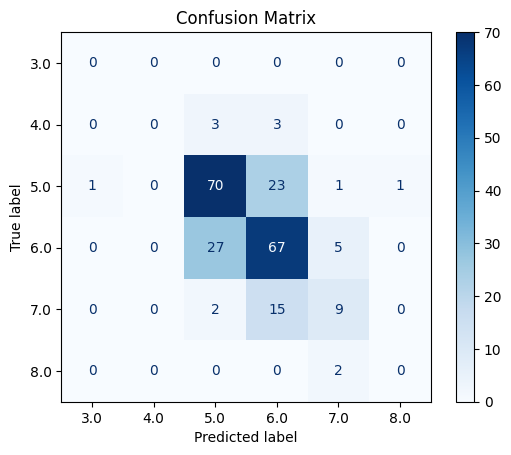

Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         6
         5.0       0.69      0.73      0.71        96
         6.0       0.62      0.68      0.65        99
         7.0       0.53      0.35      0.42        26
         8.0       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.31      0.29      0.30       229
weighted avg       0.62      0.64      0.62       229



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_std, y_pred_std)

# Plot confusion matrix as a heatmap
def plot_confusion_matrix(cm, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Labels from your label mapping
labels = list(label_mapping.keys())  # Class labels from label mapping
labels = [str(label) for label in labels]  # Convert to strings if necessary
plot_confusion_matrix(cm, labels)

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test_std, y_pred_std, target_names=labels, zero_division=0))

# C

Temperature-Scaled Predictions Confusion Matrix:


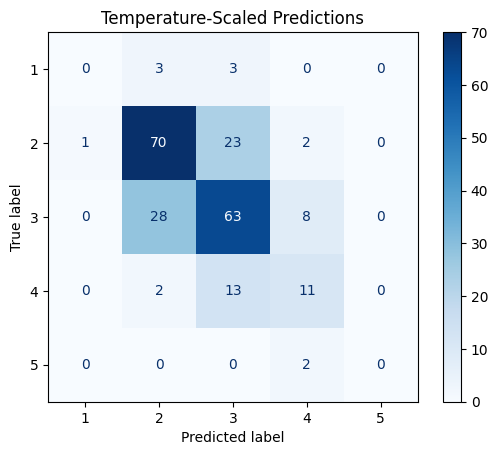

Temperature-Scaled Predictions Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.68      0.73      0.70        96
           3       0.62      0.64      0.63        99
           4       0.48      0.42      0.45        26
           5       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229



In [ ]:
def softmax_with_temperature(logits, T=1.0):
    logits = logits - np.max(logits, axis=1, keepdims=True)  # Numerical stability
    scaled_logits = logits / T
    exp_logits = np.exp(scaled_logits)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Baseline logistic regression model
model = LogisticRegression(solver="lbfgs", max_iter=500, random_state=42)
model.fit(X_train_std, y_train_std)

# Predictions with probabilities
y_pred_probs = model.predict_proba(X_test_std)

# Apply temperature scaling to probabilities
T = 0.8  # Adjust temperature
y_pred_probs_scaled = softmax_with_temperature(y_pred_probs, T=T)
y_pred_scaled = np.argmax(y_pred_probs_scaled, axis=1)

# Compute confusion matrix
cm_scaled = confusion_matrix(y_test_std, y_pred_scaled)

def plot_confusion_matrix(cm, labels=None, title="Confusion Matrix"):
    if labels is None:
        labels = [str(i) for i in range(len(cm))]  # Dynamically generate labels if not provided
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Dynamically generate labels based on unique values in y_test_std
labels = sorted([str(i) for i in np.unique(np.concatenate((y_test_std, y_pred_scaled)))])

plot_confusion_matrix(cm_scaled, labels, title="Temperature-Scaled Predictions")

print(classification_report(y_test_std, y_pred_scaled, target_names=labels, zero_division=0))